PLANT DIEASES DETECTION

In [43]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import seaborn as sns


In [44]:
tf.__version__

'2.17.0'

In [45]:
train_path = r"C:\Users\ASUS-PC\Desktop\pdd\plant diease datasets\train"

In [46]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
print(f"Number of classes: {len(training_set.class_names)}")


Found 70295 files belonging to 38 classes.
Number of classes: 38


In [47]:
valid_path = r"C:\Users\ASUS-PC\Desktop\pdd\plant diease datasets\valid"

In [48]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [49]:
mod1 = tf.keras.models.Sequential()

In [50]:
mod1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
mod1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
mod1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# mod1.add(tf.keras.layers.Dropout(0.25))  # Dropout with 25% rate


C:\Users\ASUS-PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
mod1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
mod1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
mod1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [52]:
mod1.add(tf.keras.layers.Flatten())

In [53]:
mod1.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [54]:
mod1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
mod1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │     2,188,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,254,406 (8.60 MB)

 Trainable params: 2,254,406 (8.60 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history = mod1.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
 556/2197 ━━━━━━━━━━━━━━━━━━━━ 6:58 255ms/step - accuracy: 0.3405 - loss: 8.6381

In [ ]:
#Training set Accuracy
train_loss, train_acc = mod1.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 187s 85ms/step - accuracy: 0.9243 - loss: 0.2420
Training accuracy: 0.9357137680053711


In [ ]:
#Validation set Accuracy
val_loss, val_acc = mod1.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.8248 - loss: 0.6675
Validation accuracy: 0.8229569792747498


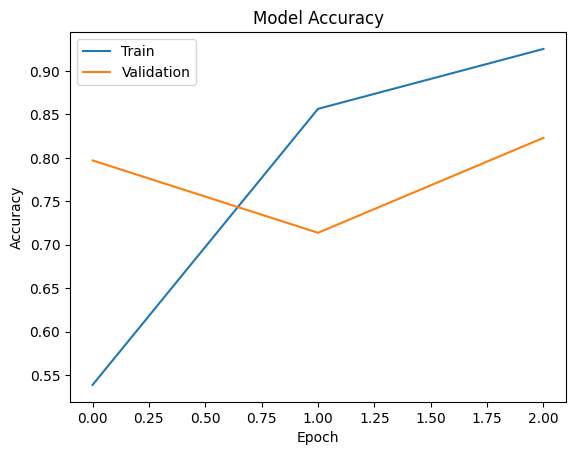

In [56]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

With accuracy of 93% and validation accruracy of 84% we can say 83% of images are correctly predicted

In [57]:
# Save the model in the native Keras format
mod1.save('final_model.keras')

In [58]:
class_names = training_set.class_names
print(type(class_names))
print(f"Class names: {class_names}")
print(f"Number of classes: {len(class_names)}")

<class 'list'>
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spide

In [59]:
test_model = tf.keras.models.load_model('final_model.keras')

C:\Users\ASUS-PC\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [60]:
val_loss, val_acc = test_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 50s 90ms/step - accuracy: 0.0264 - loss: 31.9927
Validation accuracy: 0.026747098192572594


In [35]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.02      0.02       504
                                 Apple___Black_rot       0.04      0.04      0.04       497
                          Apple___Cedar_apple_rust       0.04      0.04      0.04       440
                                   Apple___healthy       0.03      0.02      0.03       502
                               Blueberry___healthy       0.01      0.01      0.01       454
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       421
                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(maize)___Northern_Leaf_Blight     

Class Name: Tomato___Bacterial_spot
Image Index: 0, Label Index: 28
Label: Tomato___Bacterial_spot (28)
Class Name: Cherry_(including_sour)___Powdery_mildew
Image Index: 10, Label Index: 5
Label: Cherry_(including_sour)___Powdery_mildew (5)
Class Name: Tomato___Early_blight
Image Index: 20, Label Index: 29
Label: Tomato___Early_blight (29)
Class Name: Orange___Haunglongbing_(Citrus_greening)
Image Index: 30, Label Index: 15
Label: Orange___Haunglongbing_(Citrus_greening) (15)


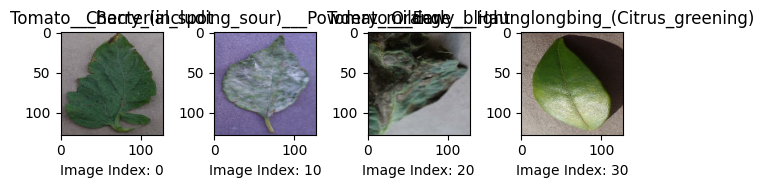

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to show an image and its label
def show_image(image, label):
    print(f"Label: {training_set.class_names[label]} ({label})")
    plt.imshow(image.numpy().astype("uint8"))

# Image list with specific indices (adjust these if necessary)
image_list = [0, 10, 20, 30,]  # Use smaller indices for initial testing
chs = 0

# Display images from the dataset
for img_idx in image_list:
    chs += 1
    plt.subplot(2, 4, chs)
    for images, labels in training_set:
        if img_idx < len(images):
            image, label = images[img_idx], labels[img_idx]
            plt.tight_layout()
            plt.xlabel(f"Image Index: {img_idx}", fontsize=10)
            
            # Use tf.argmax to get the index of the class from the one-hot encoded label
            label_idx = tf.argmax(label).numpy()
            print(f"Class Name: {training_set.class_names[label_idx]}")  # Debugging
            print(f"Image Index: {img_idx}, Label Index: {label_idx}")  # Debugging
            plt.title(training_set.class_names[label_idx], fontsize=12)  # Get the class name
            show_image(image, label_idx)  # Pass label_idx instead of label
            break

plt.show()


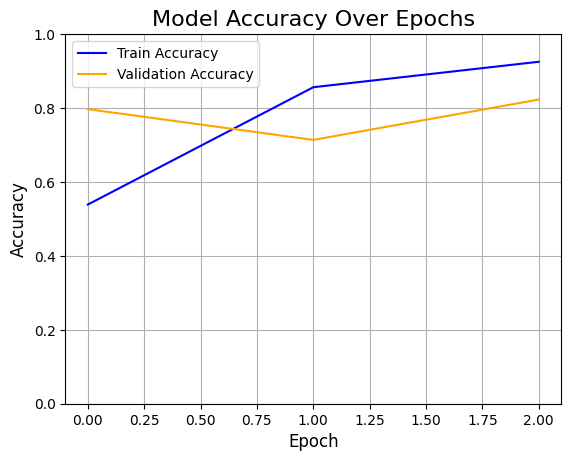

In [37]:
import matplotlib.pyplot as plt

# Plot the accuracy for both training and validation
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Title and labels
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)

# Adding a grid for better readability
plt.grid(True)

# Adding legend
plt.legend(loc='upper left', fontsize=10)

# Highlighting key points (optional: you can add custom points like the best accuracy, early stopping, etc.)
best_epoch = training_history.history['val_accuracy'].index(max(training_history.history['val_accuracy'])) + 1
plt.annotate(f'Best Val Accuracy at Epoch {best_epoch}',
             xy=(best_epoch, max(training_history.history['val_accuracy'])),
             xytext=(best_epoch + 5, max(training_history.history['val_accuracy']) - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Set axis limits (optional: adjust based on your data)
plt.ylim([0, 1])

# Display the plot
plt.show()
